In [121]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow_addons import losses
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [90]:
df = pd.read_csv('customers.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.drop('customerID', axis='columns', inplace=True)

In [92]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [93]:
#True if the corresponding element in the original 
#Series is NaN, and False otherwise.
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [94]:
#DataFrame that only includes rows where the 'TotalCharges' 
#column had non-convertible or missing values.
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [95]:
df.iloc[488]['TotalCharges']

' '

In [96]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [97]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [98]:
df[df.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


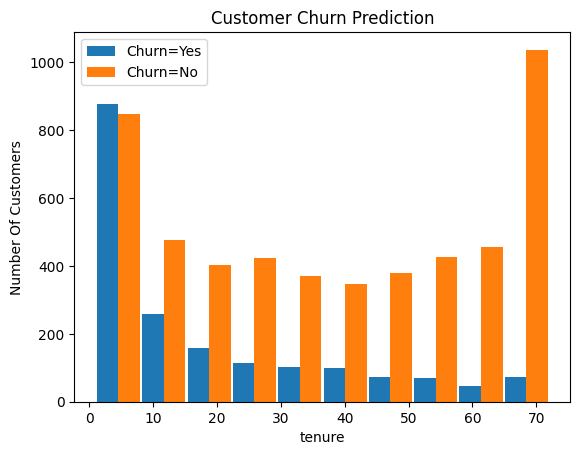

In [99]:
tenure_no_churn = df[df.Churn=='No'].tenure
tenure_churn = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")

plt.hist([tenure_churn, tenure_no_churn], rwidth=0.95,label=['Churn=Yes','Churn=No'])
plt.legend()

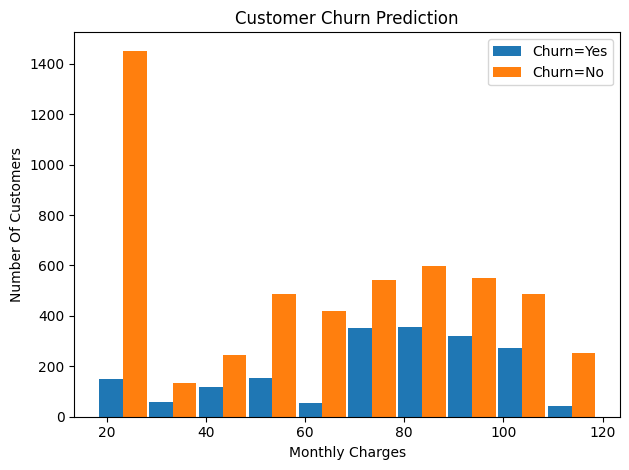

In [100]:
mc_churn_no = df[df.Churn == 'No'].MonthlyCharges
mc_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")

plt.tight_layout()
plt.show()

In [101]:
def print_unique_info(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col} : {df[col].unique()}')

In [102]:
print_unique_info(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [103]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)
df.replace('Two year', 'Two years', inplace=True)

In [104]:
column_names = list(df.columns)
for col in column_names:
    df[col].replace({'Yes':1,'No':0}, inplace=True)
df['InternetService'].replace('0','No', inplace=True)
df['gender'].replace({'Female':1,'Male':0}, inplace=True)
print_unique_info(df)

InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two years']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


#### One hot encoding

In [105]:
df1 = pd.get_dummies(data = df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two years',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [106]:
print_unique_info(df1)

In [107]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [108]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])


In [109]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#### Train&test

In [110]:
X = df1.drop('Churn', axis='columns')
y = df1.Churn.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [111]:
y_train.value_counts()

0.0    4164
1.0    1461
Name: Churn, dtype: int64

In [112]:
len(X_train.columns)

26

In [113]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
    
    evaluation_results = model.evaluate(X_test, y_test)
    print("Evaluation Results (loss, accuracy):", evaluation_results)
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    classification_rep = classification_report(y_test, y_preds)
    print("Classification Report:\n", classification_rep)
        
    return y_preds

In [114]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7196
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7957
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8025
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8039
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4063 - accura

#### Undersampling

In [115]:
num_class_0, num_class_1 = df.Churn.value_counts()

df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [116]:
df_class_0_undersampling = df_class_0.sample(num_class_1)

df_undersampling = pd.concat([df_class_0_undersampling, df_class_1], axis=0)

print(df_undersampling.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [117]:
X = df_undersampling.drop('Churn', axis='columns')
y = df_undersampling['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [118]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [119]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5709
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.7441
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7712
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7749
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7766
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7786
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7796
Epoch 11/

#### Oversampling

In [144]:
df_class_1_oversampling = df_сlass_1.sample(num_class_0, replace = True)
df_oversampling = pd.concat([df_class_0, df_class_1_oversampling], axis=0)

In [ ]:
X = df_oversampling.drop('Churn', axis='columns')
y = df_oversampling['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

In [ ]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

#### SMOTE method

In [130]:
X = df1.drop('Churn', axis='columns')
y = df1['Churn']

In [137]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15,stratify=y_sm)

In [142]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [143]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7240
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7708
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7770
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7812
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7841
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7902
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7903
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.7936
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7962
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4340 - accura

#### Ensemble with undersampling

In [129]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [147]:
X = df1.drop('Churn', axis='columns')
y = df1['Churn']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [151]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [149]:
df2 = X_train.copy()
df2['Churn'] = y_train

In [150]:
df2_class0 = df2[df2.Churn==0]
df2_class1 = df2[df2.Churn==1]

In [153]:
def batch(df_maj, df_min, start, end):
    df_train = pd.concat([df_maj[start:end], df_min], axis=0)
    
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [154]:
X_train, y_train = batch(df2_class0, df2_class1, 0, 1495)
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6069 - accuracy: 0.6702
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7435
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4992 - accuracy: 0.7622
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7676
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7736
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7779
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7759
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7786
Epoch 11/

In [156]:
X_train, y_train = batch(df2_class0, df2_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6395 - accuracy: 0.6472
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7595
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7722
Epoch 11/

In [157]:
X_train, y_train = batch(df2_class0, df2_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.7118 - accuracy: 0.5370
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7340
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7624
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7670
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7685
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7727
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7723
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7750
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7761
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7776
Epoch 11/

In [159]:
y_pred_ultimate = y_pred.copy()
for i in range(len(y_pred)):
    n = y_pred[i] + y_pred2[i] + y_pred3[i]
    if n > 1:
        y_pred_ultimate[i] = 1
    else:
        y_pred_ultimate[i] = 0

In [161]:
report = classification_report(y_test, y_pred_ultimate)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

